In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print(os.getcwd())


./data/产品物料预测说明.docx
./data/demand_train.csv
./data/提交结果模板.csv
./data/stock_train.csv
/Users/sampson/Workspace/mse1-2/material-predict


In [2]:
df_demand = pd.read_csv('./data/demand_train.csv',  encoding="gbk")
df_stock = pd.read_csv('./data/stock_train.csv',  encoding="gbk")

In [3]:
print(df_demand.size)
df_demand['过账日期'] = pd.to_datetime(df_demand['过账日期'])

df_demand.head(10)

8285165


,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类
0,2018-01-06,0.33,2004,1000,5000,3002,4014
1,2018-01-08,0.09,2010,1000,5000,3002,4014
2,2018-01-09,0.09,2008,1000,5000,3002,4014
3,2018-01-10,0.10,2010,1000,5000,3002,4014
4,2018-01-11,0.17,2004,1000,5000,3002,4014
5,2018-01-13,0.06,2008,1000,5000,3002,4014
6,2018-01-15,0.45,2004,1000,5000,3002,4014
7,2018-01-18,0.03,2010,1000,5000,3002,4014
8,2018-01-19,0.06,2008,1000,5000,3002,4014
9,2018-01-20,0.84,2004,1000,5000,3002,4014


In [4]:
# 检查同日期+工厂+物料组合的重复
key_columns = ['过账日期', '工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类']
date_factory_material_dups = df_demand[df_demand.duplicated(subset=key_columns, keep=False)]
print(f"同日期重复的组合数: {len(date_factory_material_dups)}")
date_factory_material_dups.head()

同日期重复的组合数: 1109582


,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类
10,2018-01-22,0.06,2008,1000,5000,3002,4014
11,2018-01-22,0.06,2008,1000,5000,3002,4014
33,2018-04-06,0.23,2004,1000,5000,3002,4014
34,2018-04-06,0.20,2004,1000,5000,3002,4014
35,2018-04-09,0.80,2004,1000,5000,3002,4014


In [5]:
df_demand = df_demand.groupby(key_columns)['需求量'].mean().reset_index()
df_demand.head()

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,需求量
0,2018-01-01,2001,1029,5001,3002,4006,1.29
1,2018-01-01,2001,1051,5001,3002,4013,0.09
2,2018-01-01,2001,1054,5001,3002,4010,0.70
3,2018-01-01,2001,1159,5001,3003,4001,1.24
4,2018-01-01,2001,1167,5001,3003,4023,6.40


In [6]:
df_stock['过账日期'] = pd.to_datetime(df_stock['过账日期'])

df_stock.head(10)

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,库存量
0,2018-01-24,2000,1001,5000,3002,4006,2.71
1,2018-01-24,2000,1003,5000,3002,4005,6.84
2,2018-01-24,2000,1014,5000,3002,4008,1.28
3,2018-01-24,2000,1021,5000,3002,4006,1.04
4,2018-01-24,2000,1027,5001,3002,4014,2.63
5,2018-01-24,2000,1029,5001,3002,4006,22.20
6,2018-01-24,2000,1031,5001,3002,4010,243.24
7,2018-01-24,2000,1034,5001,3002,4009,34.07
8,2018-01-24,2000,1037,5001,3002,4002,61.70
9,2018-01-24,2000,1038,5001,3002,4006,36.06


In [7]:
# 分析物料编码能否确定唯一工厂编码
df_group_test = df_demand.groupby(['物料编码'])['工厂编码'].nunique().reset_index()
df_group_test.describe()

,物料编码,工厂编码
count,294.000000,294.000000
mean,1148.676871,3.272109
std,86.036350,3.590959
min,1000.000000,1.000000
25%,1075.250000,1.000000
50%,1149.500000,2.000000
75%,1222.750000,4.000000
max,1297.000000,16.000000


In [8]:
# 分析物料编码能否确定唯一物料品类
df_group_test = df_demand.groupby(['物料编码'])['物料品类'].nunique().reset_index()
df_group_test.describe()

,物料编码,物料品类
count,294.000000,294.0
mean,1148.676871,1.0
std,86.036350,0.0
min,1000.000000,1.0
25%,1075.250000,1.0
50%,1149.500000,1.0
75%,1222.750000,1.0
max,1297.000000,1.0


In [9]:
# 分析物料编码能否确定唯一物料品牌
df_group_test = df_demand.groupby(['物料编码'])['物料品牌'].nunique().reset_index()
df_group_test.describe()

,物料编码,物料品牌
count,294.000000,294.0
mean,1148.676871,1.0
std,86.036350,0.0
min,1000.000000,1.0
25%,1075.250000,1.0
50%,1149.500000,1.0
75%,1222.750000,1.0
max,1297.000000,1.0


In [10]:
# 分析物料编码能否确定唯一物料类型
df_group_test = df_demand.groupby(['物料编码'])['物料类型'].nunique().reset_index()
df_group_test.describe()

,物料编码,物料类型
count,294.000000,294.0
mean,1148.676871,1.0
std,86.036350,0.0
min,1000.000000,1.0
25%,1075.250000,1.0
50%,1149.500000,1.0
75%,1222.750000,1.0
max,1297.000000,1.0


In [11]:
df_demand.describe()

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,需求量
count,248503,248503.000000,248503.000000,248503.000000,248503.000000,248503.000000,248503.000000
mean,2019-07-13 17:12:22.315384832,2006.758949,1078.101496,5003.058015,3002.061923,4009.843032,2.018382
min,2018-01-01 00:00:00,2000.000000,1000.000000,5000.000000,3000.000000,4000.000000,0.000000
25%,2018-11-15 00:00:00,2002.000000,1038.000000,5001.000000,3002.000000,4006.000000,0.425000
50%,2019-07-09 00:00:00,2007.000000,1052.000000,5001.000000,3002.000000,4010.000000,1.000000
75%,2020-03-27 00:00:00,2011.000000,1104.000000,5005.000000,3002.000000,4014.000000,2.485714
max,2020-11-24 00:00:00,2015.000000,1297.000000,5012.000000,3004.000000,4023.000000,64.000000
std,NaN,4.694795,59.866167,3.687115,0.639612,5.713880,2.692246


In [12]:
df_stock.describe()

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,库存量
count,14931,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000
mean,2019-07-25 04:22:25.388788480,2006.470832,1084.777443,5002.862568,3002.034425,4010.774697,34.927600
min,2018-01-24 00:00:00,2000.000000,1000.000000,5000.000000,3000.000000,4000.000000,0.000000
25%,2018-12-24 00:00:00,2002.000000,1037.000000,5001.000000,3002.000000,4006.000000,2.010000
50%,2019-07-24 00:00:00,2006.000000,1053.000000,5001.000000,3002.000000,4010.000000,8.670000
75%,2020-03-24 00:00:00,2011.000000,1125.000000,5002.000000,3002.000000,4014.000000,30.080000
max,2020-11-24 00:00:00,2015.000000,1297.000000,5012.000000,3004.000000,4023.000000,1270.690000
std,NaN,4.608461,69.556936,3.626574,0.808209,5.962419,84.648045


In [13]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248503 entries, 0 to 248502
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   过账日期    248503 non-null  datetime64[ns]
 1   工厂编码    248503 non-null  int64         
 2   物料编码    248503 non-null  int64         
 3   物料品牌    248503 non-null  int64         
 4   物料类型    248503 non-null  int64         
 5   物料品类    248503 non-null  int64         
 6   需求量     248503 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 13.3 MB


In [14]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14931 entries, 0 to 14930
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   过账日期    14931 non-null  datetime64[ns]
 1   工厂编码    14931 non-null  int64         
 2   物料编码    14931 non-null  int64         
 3   物料品牌    14931 non-null  int64         
 4   物料类型    14931 non-null  int64         
 5   物料品类    14931 non-null  int64         
 6   库存量     14931 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 816.7 KB


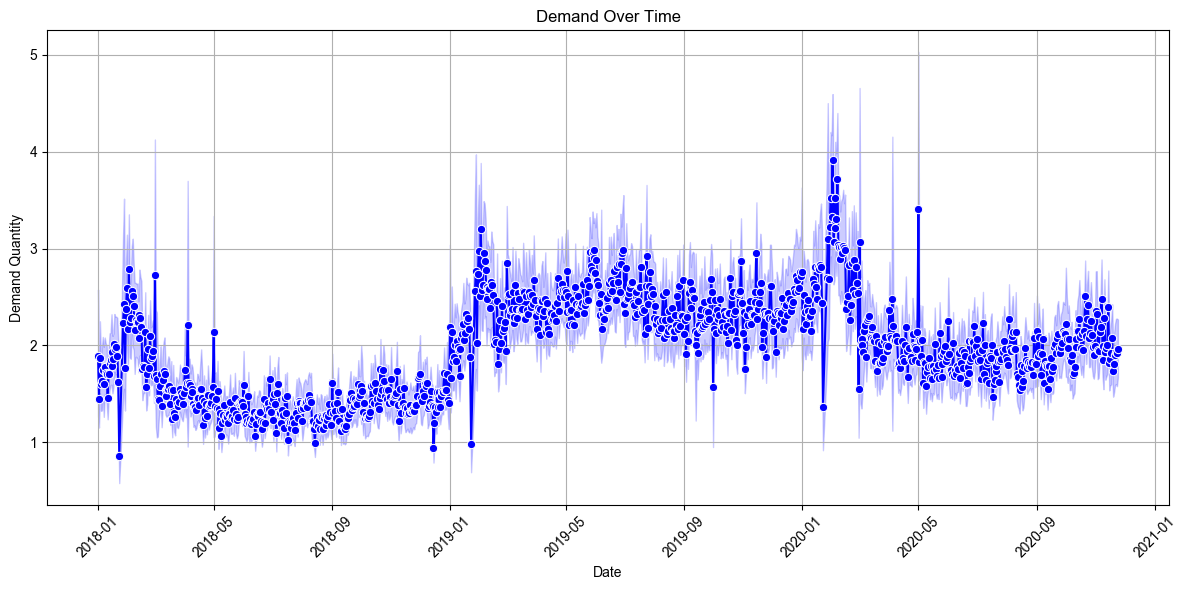

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['SimHei']  # For Windows
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # For Mac
plt.rcParams['axes.unicode_minus'] = False  # This is to display minus signs correctly


df_demand_sorted = df_demand.sort_values('过账日期')

plt.figure(figsize=(12, 6))
sns.lineplot(x='过账日期', y='需求量', data=df_demand_sorted, marker='o', color='b')
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [16]:
df_filtered = df_demand[['需求量', '工厂编码']]
df_grouped = df_filtered.groupby('工厂编码').sum().reset_index()
df_grouped.describe()

,工厂编码,需求量
count,16.000000,16.000000
mean,2007.500000,31348.371174
std,4.760952,12571.746338
min,2000.000000,12627.600911
25%,2003.750000,20708.993749
50%,2007.500000,29187.021906
75%,2011.250000,41589.204414
max,2015.000000,53499.443897


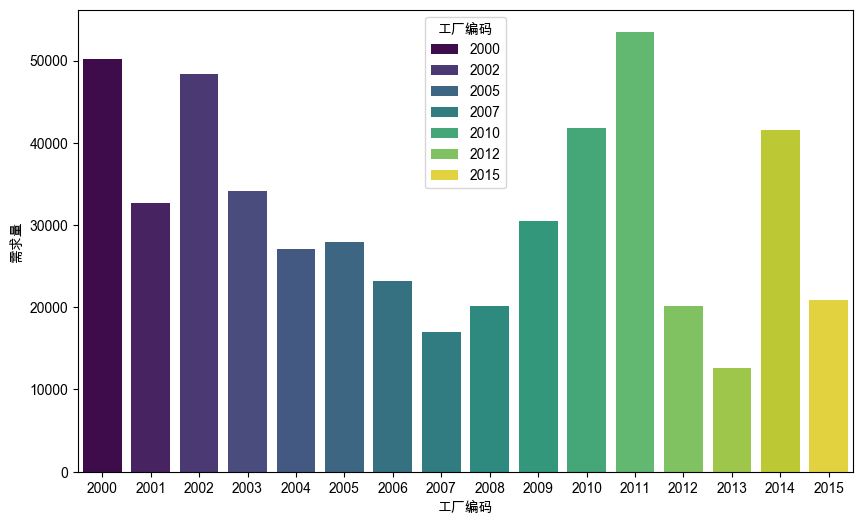

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='工厂编码', y='需求量', palette='viridis', hue='工厂编码')
plt.xlabel('工厂编码')
plt.ylabel('需求量')
plt.show()

In [18]:
df_filtered = df_demand[['需求量', '物料编码']]
df_grouped = df_filtered.groupby('物料编码').sum().reset_index()
df_grouped.describe()
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_grouped, x='物料编码', y='需求量', palette='viridis')
# plt.title('Total Demand by Factory Code')
# plt.xlabel('Material Code')
# plt.ylabel('Total Demand')
# plt.show()

,物料编码,需求量
count,294.000000,294.000000
mean,1148.676871,1706.033805
std,86.036350,4670.694564
min,1000.000000,0.200000
25%,1075.250000,59.122500
50%,1149.500000,326.549645
75%,1222.750000,1218.674167
max,1297.000000,48252.288121


In [19]:
df_filtered = df_demand[['需求量', '物料类型']]
df_grouped = df_filtered.groupby('物料类型').sum().reset_index()
df_grouped.describe()

,物料类型,需求量
count,5.000000,5.000000
mean,3002.000000,100314.787755
std,1.581139,131494.380462
min,3000.000000,2126.323838
25%,3001.000000,16594.735753
50%,3002.000000,23974.853865
75%,3003.000000,147771.545460
max,3004.000000,311106.479861


/var/folders/v5/g47_227965503jwr64326bnw0000gn/T/ipykernel_65409/561124681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='物料类型', y='需求量', palette='viridis')


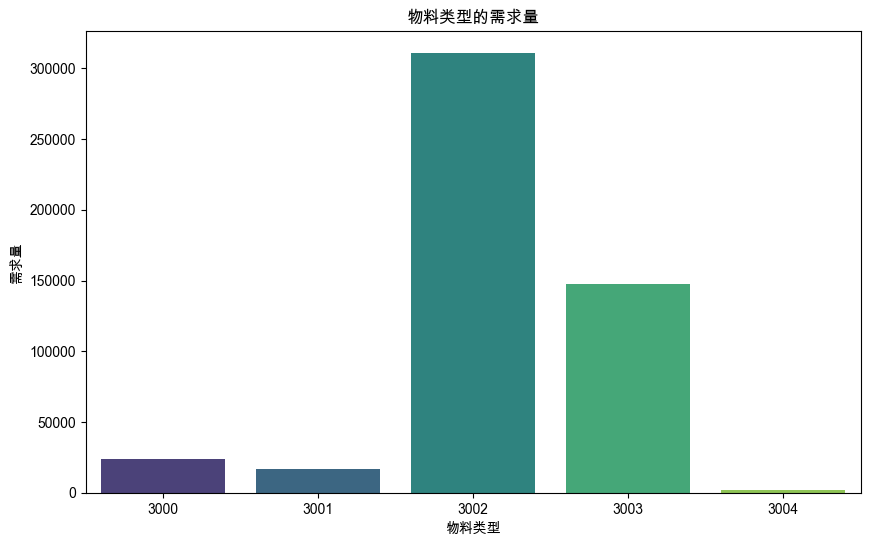

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='物料类型', y='需求量', palette='viridis')
plt.title('物料类型的需求量')
plt.xlabel('物料类型')
plt.ylabel('需求量')
plt.show()

In [21]:
df_demand['年月'] = df_demand['过账日期'].dt.to_period('M').astype(str)
df_demand['月'] = df_demand['年月'].str[-2:]
df_demand['季度'] = df_demand['过账日期'].dt.quarter
df_demand.head()

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,需求量,年月,月,季度
0,2018-01-01,2001,1029,5001,3002,4006,1.29,2018-01,01,1
1,2018-01-01,2001,1051,5001,3002,4013,0.09,2018-01,01,1
2,2018-01-01,2001,1054,5001,3002,4010,0.70,2018-01,01,1
3,2018-01-01,2001,1159,5001,3003,4001,1.24,2018-01,01,1
4,2018-01-01,2001,1167,5001,3003,4023,6.40,2018-01,01,1


In [22]:
df_stock['年月'] = df_stock['过账日期'].dt.to_period('M').astype(str)
df_stock['月'] = df_stock['年月'].str[-2:]
df_stock['季度'] = df_stock['过账日期'].dt.quarter
df_stock.head()

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,库存量,年月,月,季度
0,2018-01-24,2000,1001,5000,3002,4006,2.71,2018-01,01,1
1,2018-01-24,2000,1003,5000,3002,4005,6.84,2018-01,01,1
2,2018-01-24,2000,1014,5000,3002,4008,1.28,2018-01,01,1
3,2018-01-24,2000,1021,5000,3002,4006,1.04,2018-01,01,1
4,2018-01-24,2000,1027,5001,3002,4014,2.63,2018-01,01,1


In [23]:
df_demand2 = df_demand.drop(['过账日期', '物料品牌', '物料类型', '物料品类'], axis=1)
df_demand2.head()

,工厂编码,物料编码,需求量,年月,月,季度
0,2001,1029,1.29,2018-01,01,1
1,2001,1051,0.09,2018-01,01,1
2,2001,1054,0.70,2018-01,01,1
3,2001,1159,1.24,2018-01,01,1
4,2001,1167,6.40,2018-01,01,1


In [24]:
df_stock2 = df_stock.drop(['过账日期', '物料品牌', '物料类型', '物料品类'], axis=1)
df_stock2.head()

,工厂编码,物料编码,库存量,年月,月,季度
0,2000,1001,2.71,2018-01,01,1
1,2000,1003,6.84,2018-01,01,1
2,2000,1014,1.28,2018-01,01,1
3,2000,1021,1.04,2018-01,01,1
4,2000,1027,2.63,2018-01,01,1


In [25]:
df_grouped = df_demand.groupby(['年月', '工厂编码', '物料编码'])['需求量'].sum().reset_index()
df_grouped.head()

,年月,工厂编码,物料编码,需求量
0,2018-01,2000,1001,12.530000
1,2018-01,2000,1003,31.850000
2,2018-01,2000,1014,5.780000
3,2018-01,2000,1021,3.960000
4,2018-01,2000,1027,3.064409


In [26]:
df_merged = pd.merge(df_demand2, df_stock2, on=['年月', '月', '季度', '工厂编码', '物料编码'])
df_merged.head()

,工厂编码,物料编码,需求量,年月,月,季度,库存量
0,2001,1029,1.29,2018-01,01,1,1.81
1,2001,1051,0.09,2018-01,01,1,4.57
2,2001,1054,0.70,2018-01,01,1,37.86
3,2001,1159,1.24,2018-01,01,1,85.18
4,2001,1167,6.40,2018-01,01,1,27.97


In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248503 entries, 0 to 248502
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   工厂编码    248503 non-null  int64  
 1   物料编码    248503 non-null  int64  
 2   需求量     248503 non-null  float64
 3   年月      248503 non-null  object 
 4   月       248503 non-null  object 
 5   季度      248503 non-null  int32  
 6   库存量     248503 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 12.3+ MB


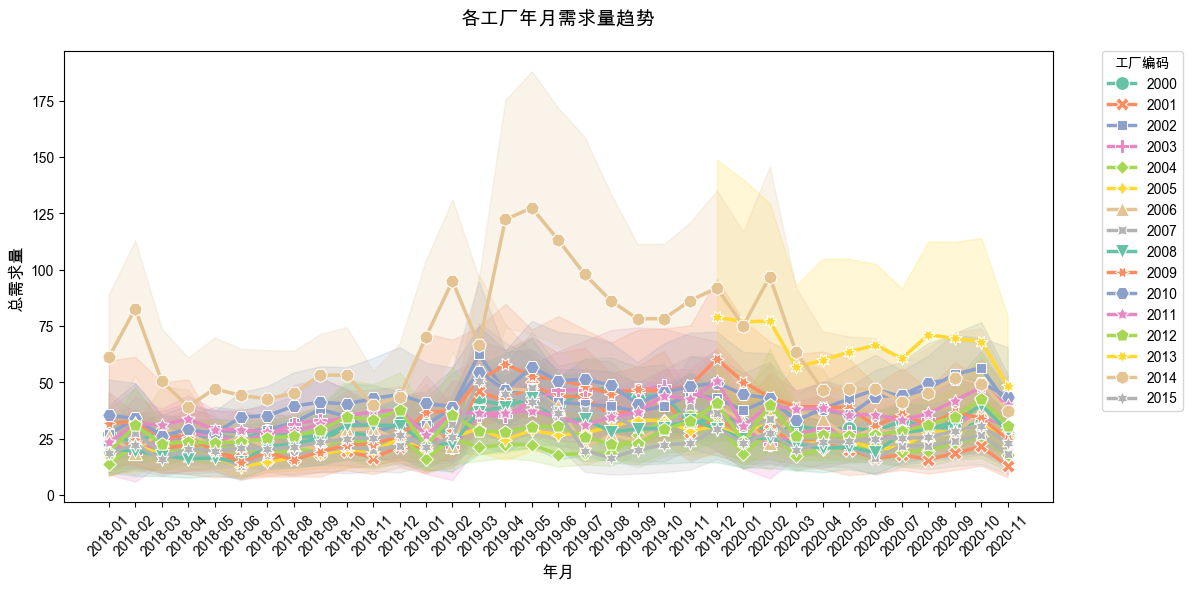

In [28]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_grouped,
    x='年月',
    y='需求量',
    hue='工厂编码',
    style='工厂编码',
    markers=True,
    dashes=False,
    palette='Set2',  # 配色方案
    linewidth=2.5,
    markersize=10
)

plt.title('各工厂年月需求量趋势', fontsize=14, pad=20)
plt.xlabel('年月', fontsize=12)
plt.ylabel('总需求量', fontsize=12)
plt.xticks(rotation=45)

plt.legend(
    title='工厂编码',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# 调整布局
plt.tight_layout()
plt.show()

In [29]:
df_grouped = df_demand.groupby(['月', '工厂编码', '物料编码'])['需求量'].sum().reset_index()
df_grouped.head()

,月,工厂编码,物料编码,需求量
0,01,2000,1001,42.460000
1,01,2000,1003,110.060000
2,01,2000,1014,20.310000
3,01,2000,1021,13.510000
4,01,2000,1027,10.503329


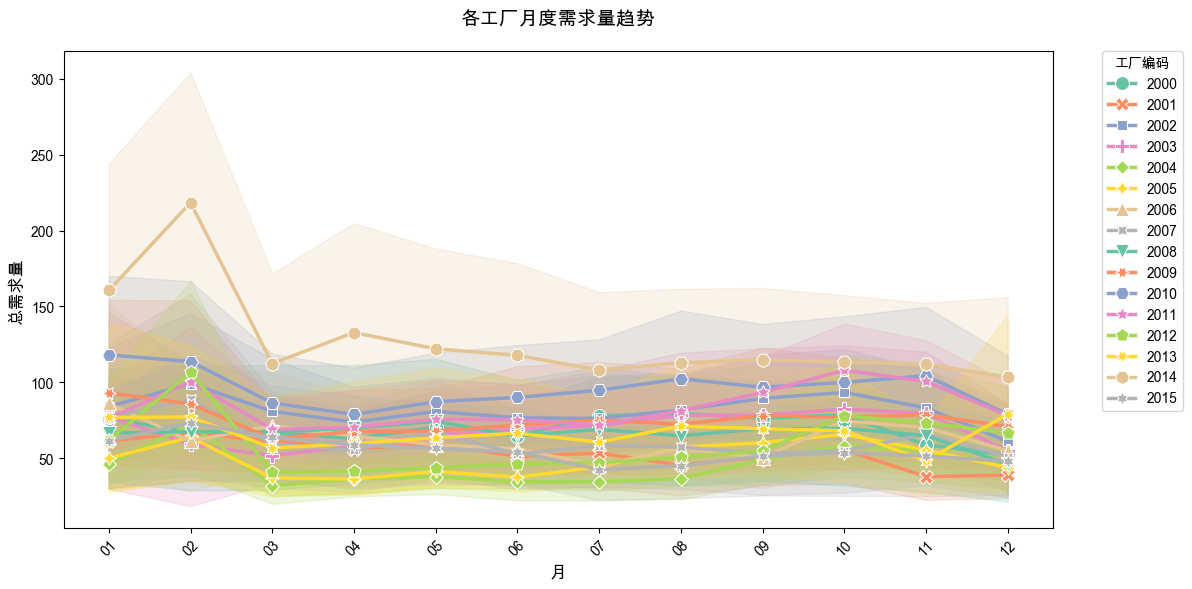

In [30]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_grouped,
    x='月',
    y='需求量',
    hue='工厂编码',
    style='工厂编码',
    markers=True,
    dashes=False,
    palette='Set2',  # 配色方案
    linewidth=2.5,
    markersize=10
)

plt.title('各工厂月度需求量趋势', fontsize=14, pad=20)
plt.xlabel('月', fontsize=12)
plt.ylabel('总需求量', fontsize=12)
plt.xticks(rotation=45)

plt.legend(
    title='工厂编码',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# 调整布局
plt.tight_layout()
plt.show()

In [31]:
df_grouped = df_demand.groupby(['季度', '工厂编码', '物料编码'])['需求量'].sum().reset_index()
df_grouped.head()

,季度,工厂编码,物料编码,需求量
0,1,2000,1001,114.765000
1,1,2000,1003,443.853333
2,1,2000,1006,61.700000
3,1,2000,1010,14.940000
4,1,2000,1014,64.800000


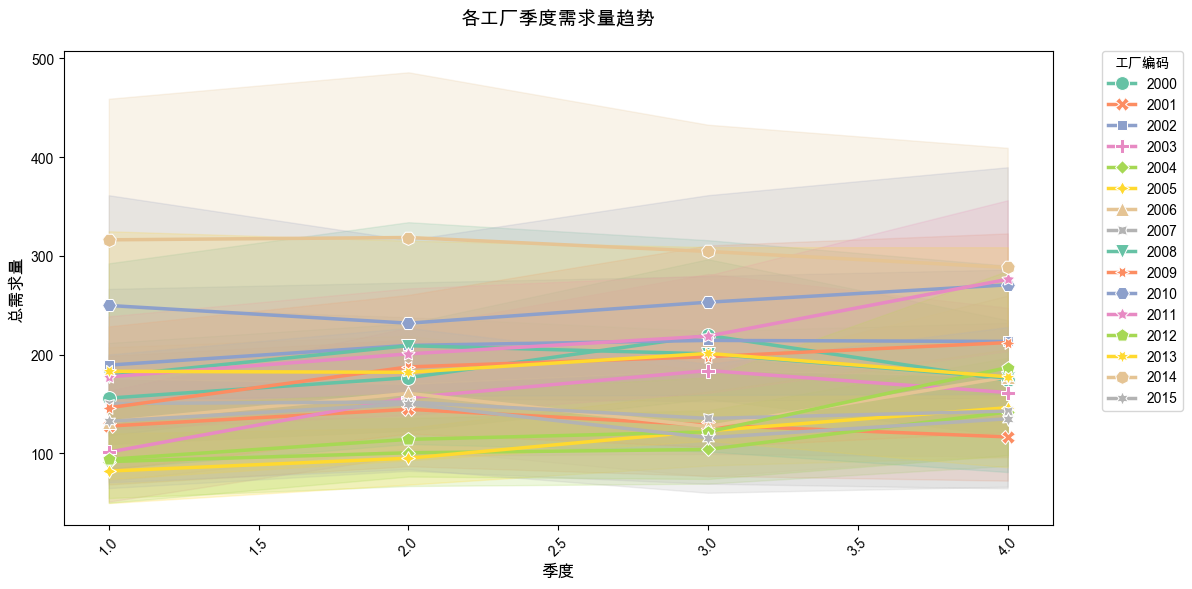

In [32]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_grouped,
    x='季度',
    y='需求量',
    hue='工厂编码',
    style='工厂编码',
    markers=True,
    dashes=False,
    palette='Set2',  # 配色方案
    linewidth=2.5,
    markersize=10
)

plt.title('各工厂季度需求量趋势', fontsize=14, pad=20)
plt.xlabel('季度', fontsize=12)
plt.ylabel('总需求量', fontsize=12)
plt.xticks(rotation=45)

plt.legend(
    title='工厂编码',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# 调整布局
plt.tight_layout()
plt.show()

In [33]:
numeric_cols = ['需求量', '工厂编码', '物料编码', '月', '季度', '库存量']
df_numeric = df_merged[numeric_cols]
correlation_matrix = df_numeric.corr()
df_numeric.head()


,需求量,工厂编码,物料编码,月,季度,库存量
0,1.29,2001,1029,01,1,1.81
1,0.09,2001,1051,01,1,4.57
2,0.70,2001,1054,01,1,37.86
3,1.24,2001,1159,01,1,85.18
4,6.40,2001,1167,01,1,27.97


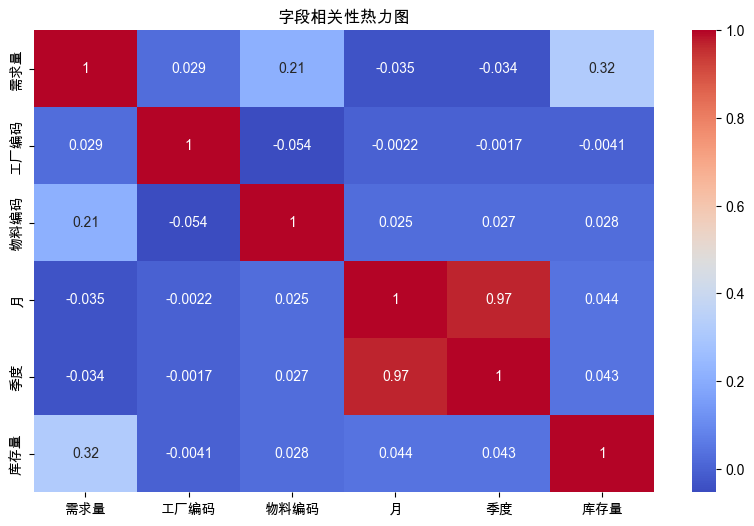

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('字段相关性热力图')
plt.show()

In [35]:
# 经分析 需求量与库存量、物料编码、工厂编码有很大可能存在关联性，考虑到最终预测是通过工厂编码 + 物料编码 进行预测的，故这里将数据进行预处理

df_merged['工厂编码_物料编码'] = df_merged['工厂编码'].astype(str) + '_' + df_merged['物料编码'].astype(str)
df_merged['年'] = df_merged['年月'].str[:4]
df_final = df_merged.groupby(['工厂编码_物料编码', '年月', '年', '月', '季度']).agg({'需求量': 'sum' }).reset_index()
df_final['年'] = df_final['年'].astype(int)
df_final['月'] = df_final['月'].astype(int)
df_final['季度'] = df_final['季度'].astype(int)
df_final.head()

,工厂编码_物料编码,年月,年,月,季度,需求量
0,2000_1001,2018-01,2018,1,1,12.530
1,2000_1001,2018-02,2018,2,1,16.080
2,2000_1001,2018-03,2018,3,1,3.125
3,2000_1001,2018-04,2018,4,2,8.780
4,2000_1001,2018-05,2018,5,2,3.142


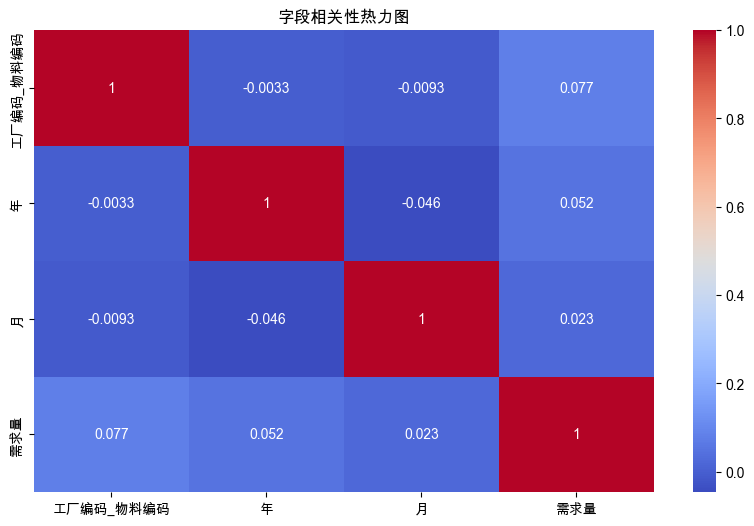

In [36]:
df_numeric = df_final[['工厂编码_物料编码', '年', '月', '需求量']]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('字段相关性热力图')
plt.show()

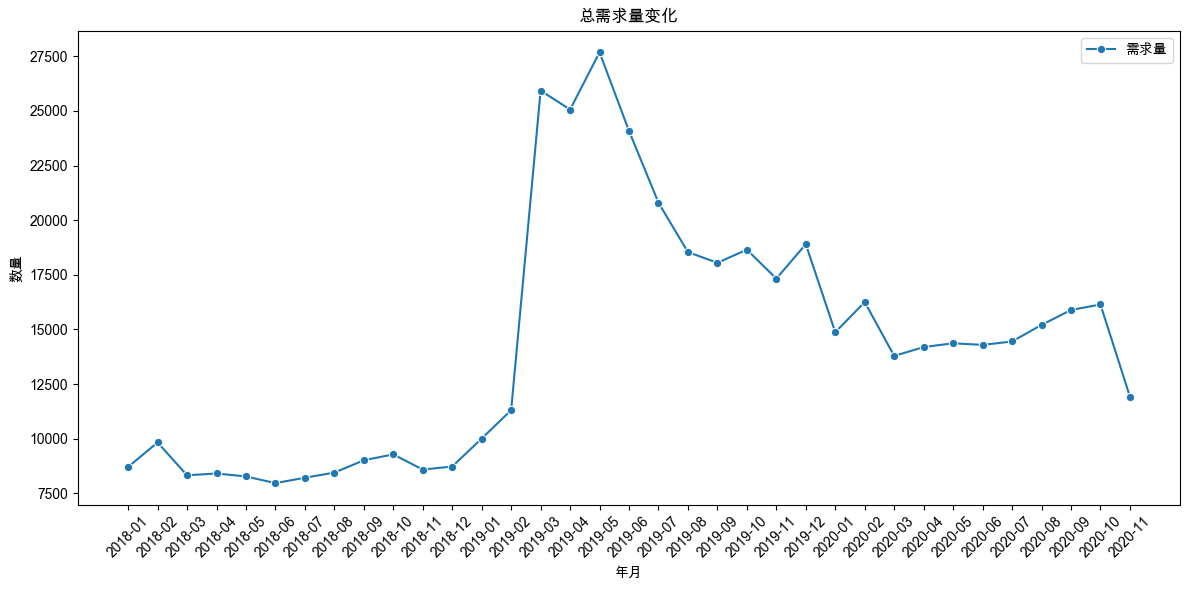

In [37]:
df_plot_by_date = df_final.groupby('年月').agg({'需求量': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_plot_by_date, x='年月', y='需求量', label='需求量', marker='o')

plt.title('总需求量变化')
plt.xlabel('年月')
plt.ylabel('数量')
plt.xticks(rotation=45) 

plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

In [38]:
specific_code = '2000_1001'
df_filtered = df_final[df_final['工厂编码_物料编码'] == specific_code]
df_filtered.drop(columns=['工厂编码_物料编码', '年', '月', '季度'], inplace=True)
df_filtered.set_index('年月', inplace=True)
df_filtered.head()

/var/folders/v5/g47_227965503jwr64326bnw0000gn/T/ipykernel_65409/966334138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['工厂编码_物料编码', '年', '月', '季度'], inplace=True)


,需求量
年月,
2018-01,12.530
2018-02,16.080
2018-03,3.125
2018-04,8.780
2018-05,3.142


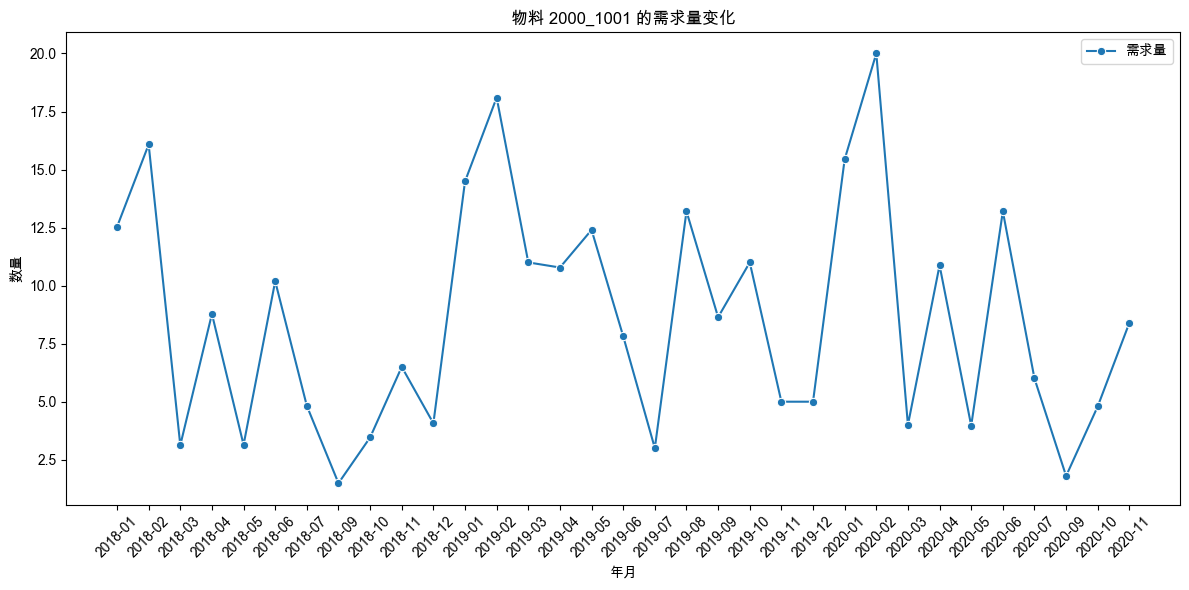

In [39]:


plt.figure(figsize=(12, 6))

sns.lineplot(data=df_filtered, x='年月', y='需求量', label='需求量', marker='o')

plt.title(f'物料 {specific_code} 的需求量变化')
plt.xlabel('年月')
plt.ylabel('数量')
plt.xticks(rotation=45) 

plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

In [40]:
df_copy = df_filtered.copy()
df_copy['diff'] = df_copy.diff()
df_copy['diff2'] = df_copy['diff'].diff()

df_copy.head()

,需求量,diff,diff2
年月,,,
2018-01,12.530,NaN,NaN
2018-02,16.080,3.550,NaN
2018-03,3.125,-12.955,-16.505
2018-04,8.780,5.655,18.610
2018-05,3.142,-5.638,-11.293


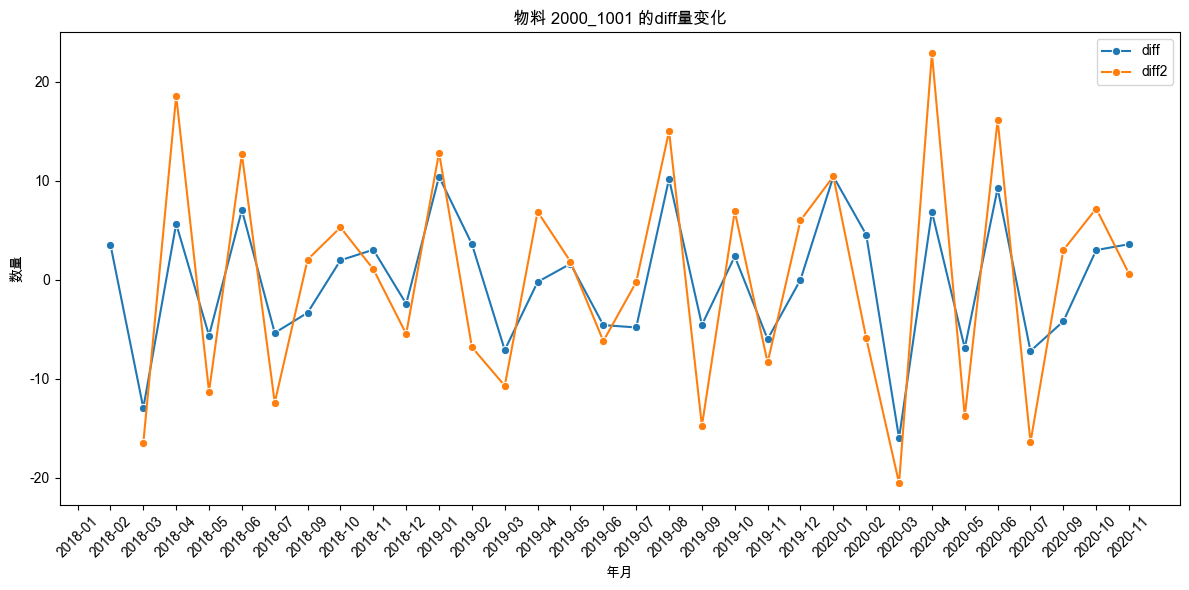

In [41]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_copy, x='年月', y='diff', label='diff', marker='o')
sns.lineplot(data=df_copy, x='年月', y='diff2', label='diff2', marker='o')


plt.title(f'物料 {specific_code} 的diff量变化')
plt.xlabel('年月')
plt.ylabel('数量')
plt.xticks(rotation=45) 

plt.legend()

# 显示图形
plt.tight_layout()
plt.show()